theta = np.linspace(-np.pi / 2, np.pi / 2, 100)

В этой строке кода используется функция np.linspace из библиотеки NumPy для создания массива значений. Эта функция принимает три аргумента: начальное значение, конечное значение и количество значений.

-np.pi / 2: Это начальное значение диапазона. Здесь используется значение -np.pi / 2, что соответствует углу в -90 градусов. np.pi - это значение числа пи в библиотеке NumPy.
np.pi / 2: Это конечное значение диапазона. Здесь используется значение np.pi / 2, что соответствует углу в 90 градусов.

Почему такие углы? В данном случае углы дифракции (theta) варьируются от -pi/2 до pi/2, что соответствует диапазону от -90 до 90 градусов.
Это означает, что мы рассматриваем дифракцию света, происходящую в полукруге вокруг точки, где свет падает на решетку.
Это стандартный выбор для анализа дифракции, поскольку он покрывает все возможные направления, в которых может распространяться дифракционный свет.

100: Это количество значений в массиве. Функция np.linspace создаст 100 равномерно распределенных значений между -np.pi / 2 и np.pi / 2.
Таким образом, theta становится массивом из 100 значений, равномерно распределенных от -np.pi / 2 до np.pi / 2. Эти значения представляют углы дифракции, которые будут использоваться при расчете дифракционного паттерна.

Почему столько значений? Значение 100 в функции np.linspace определяет количество точек в диапазоне углов. Большее количество точек приводит к более детализированному и точному представлению дифракционного паттерна. Однако это также требует больше вычислительных ресурсов.


В контексте дифракции света, угол дифракции - это угол между направлением входящего света и направлением дифракционного максимума (яркой полосы). Этот массив будет использоваться для расчета углов, под которыми наблюдаются дифракционные максимумы.
````

````
wavelength = np.linspace(400, 750, 2000)

В этой строке кода wavelength = np.linspace(400, 750, 2000) создается массив значений длин волн света для моделирования дифракции.

np.linspace(400, 750, 2000): Это вызов функции linspace из библиотеки NumPy, которая генерирует равномерно распределенные числа в заданном интервале. В данном случае она генерирует 2000 чисел в диапазоне от 400 до 750.

400, 750: Это диапазон длин волн света в нанометрах, который мы хотим исследовать. Значение 400 нм обычно соответствует голубому цвету, а 750 нм - красному. Таким образом, этот диапазон покрывает почти все видимое спектральное пространство, которое может воспринимать человеческий глаз.
2000: Это количество точек, которые мы хотим сгенерировать в этом диапазоне. Большее количество точек приводит к более детальному и точному представлению дифракционного паттерна. Однако это также требует больше вычислительных ресурсов. Значение 2000 является разумным компромиссом между точностью и вычислительной эффективностью.

Таким образом, wavelength = np.linspace(400, 750, 2000) генерирует массив из 2000 длин волн света, равномерно распределенных от 400 до 750 нм. Эти значения затем используются при расчете дифракционного паттерна для каждой длины волны. 
````

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize

period = 1.0
total_strokes = 1000
d = 3

theta = np.linspace(-np.pi / 2, np.pi / 2, 100)
wavelength = np.linspace(400, 750, 2000)

In [2]:
Theta, Wavelength = np.meshgrid(theta, wavelength)

````
Intensity = np.sin(np.pi * period * np.sin(Theta) / Wavelength) ** 2 / \
            ((np.pi * period * np.sin(Theta) / Wavelength) ** 2)

tmp = np.sin(np.pi * total_strokes * d * np.sin(Theta) / Wavelength) ** 2 / \
            np.sin(np.pi * d * np.sin(Theta) / Wavelength) ** 2
````

У нас тут I_0 = 1 для более простых вычислений, поскольку по условию это не входные данные, но при этом I_0 должна определяться экспериментально.

<p align="center">
    <img width="1044" src="images/img_1.png" alt="qr"/>
</p>

In [3]:
Intensity = np.sin(np.pi * period * np.sin(Theta) / Wavelength) ** 2 / \
            ((np.pi * period * np.sin(Theta) / Wavelength) ** 2)

tmp = np.sin(np.pi * total_strokes * d * np.sin(Theta) / Wavelength) ** 2 / \
            np.sin(np.pi * d * np.sin(Theta) / Wavelength) ** 2

Intensity *= tmp

colors = [(0.0, 'violet'), (0.15, 'indigo'), (0.3, 'blue'),
          (0.45, 'green'), (0.6, 'yellow'),
          (0.75, 'orange'), (1.0, 'red')]
cmap_wave = LinearSegmentedColormap.from_list('wave', colors)

/var/folders/8s/ln46pv3n7qgb98yxx6r2vj8c0000gn/T/ipykernel_7451/1185890588.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


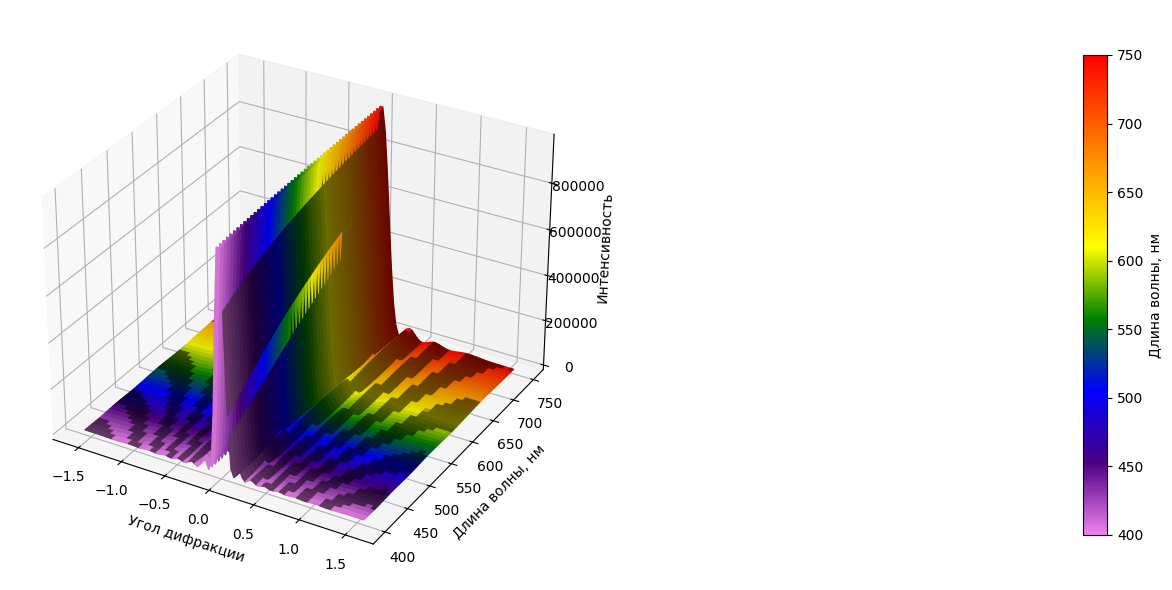

In [4]:
norm = Normalize(vmin=wavelength.min(), vmax=wavelength.max())

fig2 = plt.figure(figsize=(12, 6))

ax1 = fig2.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(Theta, Wavelength, Intensity, facecolors=cmap_wave(norm(Wavelength)))
ax1.set_xlabel('Угол дифракции')
ax1.set_ylabel('Длина волны, нм')
ax1.set_zlabel('Интенсивность')

ax2 = fig2.add_axes([0.91, 0.1, 0.02, 0.8])
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap_wave), cax=ax2)
cbar.set_label('Длина волны, нм')

plt.tight_layout()
plt.show()

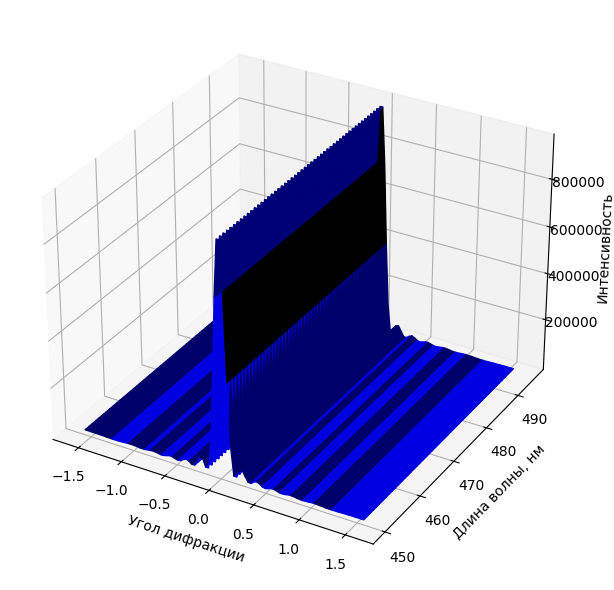

In [5]:
wavelength = np.linspace(450, 495, 2000)
Theta, Wavelength = np.meshgrid(theta, wavelength)

blue_wavelength = 470

Intensity_blue = np.sin(np.pi * period * np.sin(Theta) / blue_wavelength) ** 2 / \
            ((np.pi * period * np.sin(Theta) / blue_wavelength) ** 2)

tmp = np.sin(np.pi * total_strokes * d * np.sin(Theta) / blue_wavelength) ** 2 / \
            np.sin(np.pi * d * np.sin(Theta) / blue_wavelength) ** 2

Intensity_blue *= tmp
fig3 = plt.figure(figsize=(6, 6))
ax3 = fig3.add_subplot(111, projection='3d')

colors_blue = [(0.0, 'blue'), (0.5, 'blue'), (0.75, 'darkblue'), (1.0, 'black')]
cmap_blue = LinearSegmentedColormap.from_list('blue', colors_blue)

norm_intensity = Normalize(vmin=Intensity_blue.min(), vmax=Intensity_blue.max())

surf2 = ax3.plot_surface(Theta, Wavelength, Intensity_blue, facecolors=cmap_blue(norm_intensity(Intensity_blue)))

ax3.set_xlabel('Угол дифракции')
ax3.set_ylabel('Длина волны, нм')
ax3.set_zlabel('Интенсивность')

plt.tight_layout()
plt.show()